In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


<a id="1"></a> <br>
# 1. Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

<a id="1"></a> <br>
# 2. Import Dataset

In [3]:
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
df_data = pd.concat([df_train,df_test]).reset_index(drop=True)

In [4]:
df_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0


In [5]:
df_data.drop('SalePrice',axis=1, inplace=True)

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

****From info(), we can see that we have null values in the data****

In [7]:
df_data.shape

(2919, 80)

<a id="1"></a> <br>
# 3. Preprocessing

We will keep columns that have null values <= 5% and discard any column that has null values > 5%

In [8]:
# drop nulls at specefic percentage
percent = 5
min_count_nan = len(df_data.index)-int((len(df_data.index)*percent)/100)
print("Columns that have Null values Greater than ", min_count_nan," will drop it")

Columns that have Null values Greater than  2774  will drop it


In [9]:
df_data.dropna(axis=1,thresh=min_count_nan).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2917 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [10]:
# from above we can know features that have missing > 5% and we will drop it 
# and features that have missing <= 5% to handle all of them

drop_col = []
hold_col = []

# loop to check percent in each columns
for col in df_data.columns:
    if df_data[col].isnull().sum() > len(df_data.index)-min_count_nan:
        drop_col.append(col)
    elif (df_data[col].isnull().sum() <= len(df_data.index)-min_count_nan) & (df_data[col].isnull().sum()!=0):
        hold_col.append(col)
        

In [11]:
print("We have ",len(hold_col),"features have small missing values in it. These columns are :\n\n", hold_col)
print('\n','--'*30,'\n')
print("We have ",len(drop_col),"features have alot of missing values in it. These columns are :\n\n",drop_col)

We have  23 features have small missing values in it. These columns are :

 ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'SaleType']

 ------------------------------------------------------------ 

We have  11 features have alot of missing values in it. These columns are :

 ['LotFrontage', 'Alley', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [12]:
df_data.shape

(2919, 80)

In [13]:
# Drop features that have missing ratio > 5%
df_data.drop(drop_col,axis=1,inplace=True)
df_data.shape

(2919, 69)

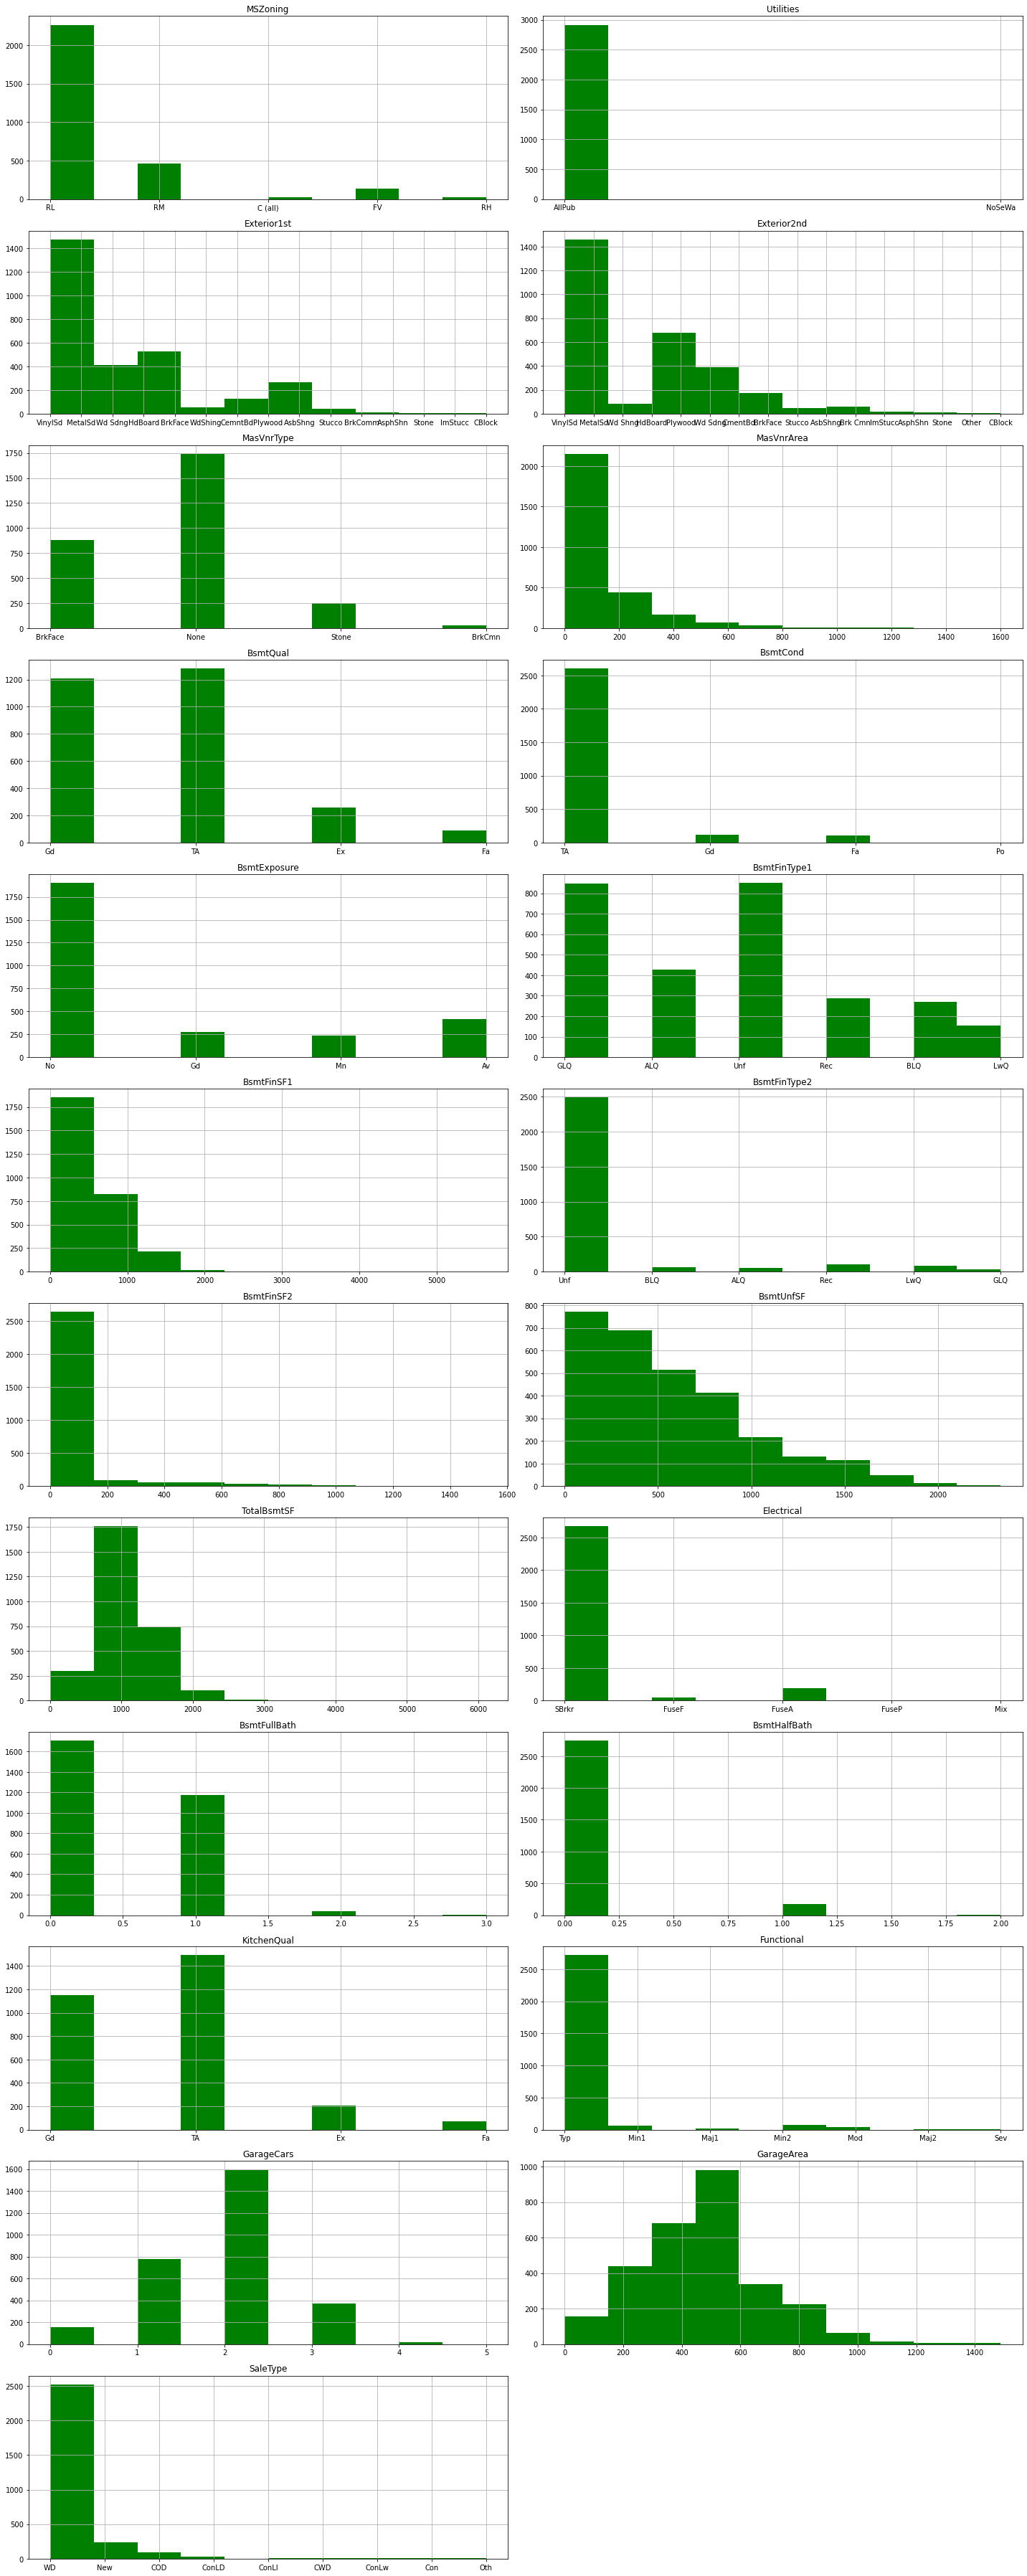

In [14]:
n_col=2
n_row = int((len(hold_col)/n_col)+1)
fig=plt.figure(figsize=(20,50))
# Histograms of feature columns that we will impute
for i,col in enumerate(hold_col):
    ax=fig.add_subplot(n_row,n_col,i+1)
    df_data[col].hist(color='green')
    ax.set_title(col)
fig.tight_layout()  # Improves appearance a bit
plt.show()    

In [15]:
for col in hold_col:
    if df_data[col].dtype == 'object':
        df_data[col].fillna(df_data[col].mode()[0],inplace=True)
    else:
        df_data[col].fillna(df_data[col].mean(),inplace=True)

In [16]:
mising_values = [col for col in df_data.columns if df_data[col].isnull().any()]
len(mising_values)
# equal 0 means there is no missing values in the data :)

0

<a id="1"></a> <br>
# 3. Feature Transformation

In [17]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2919 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

****Encoding categorical features****

In [18]:
cat_featured = [col for col in df_data.columns if df_data[col].dtype =='object']

In [19]:
cat_featured

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [20]:
Columns_Enc_OneHot = ['MSZoning' ,'LandContour' ,'LotConfig','LandSlope','RoofStyle','RoofMatl','Exterior1st','MasVnrType','Heating']
Columns_Enc_Ordinal = ['Street','LotShape','Utilities','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','Electrical','KitchenQual','PavedDrive','SaleCondition','SaleType'] 

Using LabelEncoder, we are going to convert non-numerical features to numerical type. LabelEncoder basically labels the classes from 0 to n. This process is necessary for models to learn from those features.

In [21]:
for feature in Columns_Enc_Ordinal:
    df_data[feature] = LabelEncoder().fit_transform(df_data[feature])

To finish with, we are going to one hot encoded non-ordinal features. 

In [22]:
for feature in Columns_Enc_OneHot:
    one_hot = pd.get_dummies(df_data[feature],prefix=feature)
    df_data = pd.merge(left=df_data,right=one_hot,left_index=True,right_index=True)
    

In [23]:
# Drop Columns_Enc_OneHot
df_data.drop(Columns_Enc_OneHot,axis=1,inplace=True)

In [24]:
# drop some features that is redendent
features_throw = ['Neighborhood','Condition1','Condition2','BldgType','HouseStyle','Exterior2nd','ExterQual','Functional']
df_data.drop(features_throw, axis=1, inplace=True)

In [25]:
# Convert all datatype columns to int
df_data = df_data.astype(int)

In [26]:
df_data.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 108 columns):
 #    Column               Dtype
---   ------               -----
 0    Id                   int64
 1    MSSubClass           int64
 2    LotArea              int64
 3    Street               int64
 4    LotShape             int64
 5    Utilities            int64
 6    OverallQual          int64
 7    OverallCond          int64
 8    YearBuilt            int64
 9    YearRemodAdd         int64
 10   MasVnrArea           int64
 11   ExterCond            int64
 12   Foundation           int64
 13   BsmtQual             int64
 14   BsmtCond             int64
 15   BsmtExposure         int64
 16   BsmtFinType1         int64
 17   BsmtFinSF1           int64
 18   BsmtFinType2         int64
 19   BsmtFinSF2           int64
 20   BsmtUnfSF            int64
 21   TotalBsmtSF          int64
 22   HeatingQC            int64
 23   CentralAir           int64
 24   Electrical           int64
 

<a id="1"></a> <br>
# 4. Modeling

<span style="font-family:cursive; color:black;font-size:16px">For the modeling part we will compare 3 known Linear algorithms, and proceed to evaluate their average accuracy by a stratified kfold cross validation procedure:</span>

1: LinearRegression<br>
2: Ridge<br>
3: Lasso<br>

In [27]:
# ٍExtract Train and Test Data from df_data
df_train = df_data.iloc[:1460,:]
df_test = df_data.iloc[1460:,:]

In [28]:
# Concat SalePrice column to df_train
df_train_s = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_train['SalePrice'] = df_train_s['SalePrice']

In [29]:
X = df_train.drop('SalePrice',axis=1)
y = df_train['SalePrice']

In [30]:
# SPlitting train dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [31]:
# Regression Algorithms
pipeline_LinearRegression = Pipeline([('LinearRegression_Regression',LinearRegression())])
pipeline_Ridge = Pipeline([('Ridge_Regression',Ridge(alpha=0.1))])
pipeline_Lasso = Pipeline([('Lasso_Regression',Lasso(alpha=0.01))])


pipelines = [pipeline_LinearRegression,pipeline_Ridge,pipeline_Lasso]
pipe_dict = {0:'LinearRegression',1:'Ridge',2:'Lasso'}

In [32]:
# Fit Model
for pipe in pipelines:
    pipe.fit(X_train,y_train)

In [33]:
# Calculate Test Accuracy
for i,model in enumerate(pipelines):
    print("{} Test# Accuracy : {}\n".format(pipe_dict[i],model.score(X_test,y_test)))

LinearRegression Test# Accuracy : 0.8634546735078611

Ridge Test# Accuracy : 0.8630114101439015

Lasso Test# Accuracy : 0.8681626172933117



In [34]:
y_pred_test_Lasso = pipeline_Lasso.predict(df_test)

In [35]:
y_pred_test_Lasso

array([124571.66356245, 139909.13517878, 178996.43721489, ...,
       163385.62678725, 109749.06547982, 237696.71028432])

In [36]:
df_sample_submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [37]:
# Sample Submission
output = pd.DataFrame({'Id': df_sample_submission.Id, 'SalePrice': y_pred_test_Lasso})

output.to_csv("submission.csv", index = False)